# Calculation of the Green's Function
### Input parameter : mu(=amu) , beta
### Output parameter : g(mu, beta), dg/dmu, dg/dbeta


In [177]:
import math
import numpy as np
import cmath
import random
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
import os
print("File_path is ",os.getcwd())

File_path is  C:\Users\Rishabh Singhal\Desktop\python_code


In [179]:
def green(amu,beta):
    
    error = 1.0e-08 
    x = amu 
    y = beta 
    tau = beta 
    
    g = 0 
    gb = 0 
    gmu = 0 
     
#\tif(x.le.0.5) then 
#\tpause 
#\tendif  
 
    if ( x <= 0.98 ): 
    
        if (tau <= 10): 
            g,gb,gmu = gseries(tau,x) 
                     
        elif (x <= 0.02 ): 
            g,gb,gmu = gasym1(tau,x) 
             
        elif ( x <= 0.1 and tau <= 100. ): 
            g,gb,gmu = gasym1(tau,x) 
             
        elif ( x <= 0.2 and tau <= 50. ): 
            g,gb,gmu = gasym1(tau,x) 
             
        elif ( x <= 0.5 and tau <= 20. ): 
            g,gb,gmu = gasym1(tau,x) 
             
        elif (tau <= 15. ): 
            g,gb,gmu = gasym1(tau,x) 
             
        else : 
            g,gb,gmu = gasym2(tau,x) 
             
    elif (x>.98): 
        if(tau <= 14.5): 
            g,gb,gmu = gfilon(tau,x) 
             
    else: 
        g,gb,gmu = gfil_asym(tau,x) 
         
    return(g,gb,gmu)

In [180]:
def green1(amu,beta): 
     
    error = 1.0e-08 
    x = amu 
    y = beta 
    tau = beta 
     
    g = 0 
    gb = 0 
    gmu = 0 
     
#\tif(x.le.0.5) then 
#\tpause 
#\tendif  
 
    if ( x <= 0.98 ): 
         
        if (tau <= 10 and x<.7): 
            g,gb,gmu = gseries(tau,x) 
             
        elif (x >= 0.7 and tau<=14): 
            g,gb,gmu = gfilon(tau,x) 
             
        elif ( x <= 0.02 ): 
            g,gb,gmu = gasym1(tau,x) 
             
        elif ( x <= 0.1 and tau <= 100. ): 
            g,gb,gmu = gasym1(tau,x) 
             
        elif ( x <= 0.2 and tau <= 50. ): 
            g,gb,gmu = gasym1(tau,x) 
             
        elif ( x <= 0.5 and tau <= 20. ): 
            g,gb,gmu = gasym1(tau,x)
            
        elif (tau <= 15. ): 
            g,gb,gmu = gasym1(tau,x) 
             
        else : 
            g,gb,gmu = gasym2(tau,x) 
             
    elif (x>.98): 
        if(tau <= 14.): 
            g,gb,gmu = gfilon(tau,x) 
             
    else: 
        g,gb,gmu = gfil_asym(tau,x) 
         
    return(g,gb,gmu)

In [181]:
def gseries(tau,x): 
     
    eps = 1.0e-08 
    maxm = 100 
    sum_ = 0.  
    sumb = 0.0 
    sumt = 0. 
    tau2 = tau ** 2 
    term4_1 = 1. 
    m = 0. 
     
    term1 = 1. 
    term4 = x*1.0 
    term4t = 1. 
    term14 = term1 * term4 
    term14t = term1 * term4t 
 
    term2 = tau 
    term3 = 1. 
    term23 = term2 * term3 
 
    term2b = 1. 
    term3b = 1. 
    term23b = term2b * term3b 
 
    term = term14 * term23 
    termb = term14 * term23b 
    termt = term14t * term23 
 
    tm = term 
    tmb = termb 
    tmt = termt 
 
    sum_ = sum_ +  2.* term 
    sumb = sumb +  2.* termb 
    sumt = sumt +  2.* termt 
 
    term40 = term4 
 
    tm0 = tm 
    tmb0 = tmb 
    tmt0 = tmt 
     
     
    m=1.0 
     
    while(m<maxm): 
         
        m2 = 2.*m 
        term1 = - term1 
        term4 = ( (m2+1)*x*term40 - m*term4_1 ) / (m+1) 
        term4t = ((m+1)*x*term4 - (m+1)*term40)/(x**2-1.) 
        term14 = term1 * term4 
        term14t = term1 * term4t 
 
        term2 = term2 * tau2 
        term3 = term3 * (m+1)/(m2*(m2+1)) 
        term23 = term2 * term3 
        term2b = term2b * tau2 
        term3b = term3 * (m2+1) 
        term23b = term2b * term3b 
 
        term = term14 * term23 
        termb = term14 * term23b 
        termt = term14t * term23 
         
        tm = term 
        tmb = termb 
        tmt = termt 
 
        sum_ = sum_ + 2.* term 
        sumb = sumb + 2.* termb 
        sumt = sumt + 2.* termt 
 
        term4_1 = term40 
        term40 = term4 
     
     
        if(m<2.): 
            tm_1 = tm0 
            tm0 = tm 
            tmb_1 = tmb0 
            tmb0 = tmb 
            tmt_1 = tmt0 
            tmt0 = tmt 
            m = m+1 
            continue             
         
        else: 
            er = abs(tm + tm0 + tm_1) 
            erb = abs(tmb + tmb0 + tmb_1) 
            ert = abs(tmt + tmt0 + tmt_1) 
 
            error = er 
             
            if (error < erb): 
                error = erb 
                 
            if (error < ert): 
                error = ert 
         
         
            tm_1 = tm0 
            tm0 = tm 
            tmb_1 = tmb0 
            tmb0 = tmb 
            tmt_1 = tmt0 
            tmt0 = tmt 
             
            if (error > eps): 
                m=m+1 
                continue 
                 
        break 
     
    g = sum_ 
    gb = sumb 
    gt = sumt 
 
    return(g,gb,gt)

In [182]:
def gasym2(tau,x): 
     
    eps,maxm = 1.0e-8,50 
    tau_2 = 1./(tau**2) 
 
    ss = 0. 
    ssb = 0. 
    sst = 0. 
 
    n = 0. 
 
    tm1top = 2. 
    tm1bot = 1. 
    tm1 = tm1top/tm1bot 
 
    tm2 = tau**(-2.*n - 3.) 
    tm3 = 1. 
    tmt3 = 0. 
    tm = tm1 * tm2 * tm3 
    tmb = - tm * (2.*n + 3.)/tau 
    tmt = tm1 * tm2 * tmt3 
 
    atm = tm 
    atmb = tmb 
    atmt = tmt 
 
    ss = ss + tm 
    ssb = ssb + tmb 
    sst = sst + tmt 
    tm3_1 = tm3 
 
    atm0 = atm 
    atmb0 = atmb 
    atmt0 = atmt 
    n=1.0 
     
    while(n<maxm): 
         
        tm1top = tm1top * (2.*n+2.)*(2.*n+1.) 
        tm1bot = tm1bot * n 
        tm1 = tm1top/tm1bot 
 
        tm2 = tm2 * tau_2 
 
        if ( n == 1 ): 
            tm3 = x 
            tmt3 = 1. 
            tm3_0 = tm3 
             
        else : 
            mm = n-1 
            tm3 = ( (2.*mm+1)*x*tm3_0 - mm*tm3_1)/(mm+1) 
            tmt3 = (n*x*tm3 - n*tm3_0)/(x**2 - 1.) 
            tm3_1 = tm3_0 
            tm3_0 = tm3 
             
        tm = tm1 * tm2 * tm3 
        tmb = tm * (-2.*n - 3.)/tau 
        tmt = tm1 * tm2 * tmt3 
 
        atm = tm 
        atmb = tmb 
        atmt = tmt 
 
        ss = ss + tm 
        ssb = ssb + tmb 
        sst = sst + tmt 
         
        if (n < 2): 
            atm_1 = atm0 
            atm0 = atm 
            atmb_1 = atmb0 
            atmb0 = atmb 
            atmt_1 = atmt0 
            atmt0 = atmt 
                 
            n=n+1 
            continue 
             
        else: 
            er = abs(atm + atm0 + atm_1) 
            erb = abs(atmb + atmb0 + atmb_1) 
            ert = abs(atmt + atmt0 + atmt_1) 
 
            error = er 
             
            if (error < erb): 
                error = erb 
                 
            if (error < ert): 
                error = ert 
 
            atm_1 = atm0 
            atm0 = atm 
            atmb_1 = atmb0 
            atmb0 = atmb 
            atmt_1 = atmt0 
            atmt0 = atmt 
 
            if (error > eps) : 
                n=n+1 
                continue 
         
        break 
         
    g = - 4.*ss 
    gb = -4.*ssb 
    gt = -4.*sst 
 
    return(g,gb,gt)

In [183]:
def gasym1(tau,x): 
     
    amu = x 
    beta = tau 
 
 
    b  = beta 
    b2 = beta**2 
    b3 = b *b2 
    b4 = b2*b2 
    b5 = b3*b2 
    b6 = b3*b3 
    b7 = b5*b2 
    b8 = b4*b4 
 
    amu2 = amu**2 
    a2 = math.sqrt(1-amu2) 
    a1 = math.sqrt(a2) 
    a3 = a1 * a2 
    a5 = a3 * a2 
    a7 = a5 * a2 
    a9 = a7 * a2 
    a1b = 0.25* b2 * a2 
    th = math.asin(amu) 
    ba22 = b * a2 / 2. 
    aa1 = 1 / a1 
    ba1 = b / a1 
 
    bb = 0.25*amu*b2 
 
    a15 = a1b + 1.5*th 
    s15 = math.sin(a15) 
    c15 = math.cos(a15) 
    t1 =  ba1 * s15 
    tb1=  aa1 * s15   +  ba1 * c15 * ba22 
    tt1= 0.5*amu*b*s15/a5 + b*c15*(-bb + 1.5)/a3 
 
    a_5 = a1b - 0.5*th 
    s_5 = math.sin(a_5) 
    c_5 = math.cos(a_5) 
    ba3 =  1./(2.* b*a3) 
    b2a3 = 1./(2.*b2*a3) 
    t2 =   ba3  * c_5 
    tb2= - b2a3 * c_5  - ba3 * s_5 * ba22 
    tt2 = 0.75*amu*c_5/(b*a7) + 0.5*s_5*(bb+0.5)/(b*a5) 
 
    a_15 = a1b - 1.5*th 
    s_15 = math.sin(a_15) 
    c_15 = math.cos(a_15) 
    b3a3 = 1./(   b3*a3) 
    b4a3 = 1./(   b4*a3) 
    t3 =       b3a3 * s_15 
    tb3= - 3.* b4a3 * s_15  +  b3a3 * c_15 * ba22 
    tt3 = 1.5*amu*s_15/(b3*a7) - c_15*(bb+1.5)/(b3*a5) 
 
    a_25 = a1b - 2.5*th 
    s_25 = math.sin(a_25) 
    c_25 = math.cos(a_25) 
    b3a5 =  9./(8.*b3*a5) 
    b4a5 = 27./(8.*b4*a5) 
    t4 = - b3a5 * s_25 
    tb4 = b4a5 * s_25 - b3a5 * c_25 * ba22 
    tt4 = -2.8125*amu*s_25/(b3*a9) + 1.125*c_25*(bb+2.5)/(b3*a7) 
 
    a_35 = a1b - 3.5*th 
    s_35 = math.sin(a_35) 
    c_35 = math.cos(a_35) 
    b5a3 = 9./(b5*a3) 
    b6a3 = 45./(b6*a3) 
    t5 = - b5a3 * c_35 
    tb5= b6a3 * c_35  + b5a3 * s_35 * ba22 
    tt5= -13.5*amu*c_35/(b5*a7) - 9.*s_35*(bb+3.5)/(b5*a5) 
 
    b5a3 = 24./(b5*a3) 
    b6a3 = 120./(b6*a3) 
    t6 = b5a3 * c_25 
    tb6= - b6a3 * c_25 - b5a3 * s_25 * ba22 
    tt6 = 36.*amu*c_25/(b5*a7) + 24.*s_25*(bb+2.5)/(b5*a5) 
 
    amu2_1 = 3.*amu2 - 1. 
    t0 = - 4./b3 -  48.*amu/b5 -  360.*amu2_1 / b7 
    t0b = 12./b4 + 240.*amu/b6 + 2520.*amu2_1 / b8 
    t0t = -48./b5 - 2160.*amu/b7 
    te  = math.exp(-b2*amu/4.)/math.sqrt(2.) 
    tn  = te * (t1+t2+t3+t4+t5+t6) 
    tnb1 = -0.5 * amu * b * tn 
    tnt1 = -0.25      *b2 * tn 
    tnb2 = te * (tb1 + tb2 + tb3 + tb4 + tb5 + tb6) 
    tnt2 = te * (tt1 + tt2 + tt3 + tt4 + tt5 + tt6) 
 
    g  = t0 + tn 
    gb = t0b + tnb1 + tnb2 
    gt = t0t + tnt1 + tnt2 
 
    g = 2.* g 
    gb = 2.*gb 
    gt = 2.*gt 
     
    return(g,gb,gt)

In [184]:
def grr(eta,zzi,zta,r10,r20,tt): 
     
    r05 = math.sqrt(r10) 
    r15 = r05 * r10 
    r25 = r05 * r20 
    r30 = r10 * r20 
    r35 = r05 * r30 
 
    db = - 0.5 * sgrav * tt / r25 
 
    dbx = db * eta 
    dby = db * zzi 
    dbz = db * zta 
 
    dm = zta / r30 
 
    dmx = eta * dm 
    dmy = zzi * dm 
    dmz = - 1./r10 + zta * dm 
 
    dg = -1.5 * sgrav / r35 
 
    dgx = dg * eta 
    dgy = dg * zzi 
    dgz = dg * zta 
 
    gr3 = sgrav / r15 
 
    dgx = gr3 * ( gmu * dmx + gb * dbx ) + g * dgx 
    dgy = gr3 * ( gmu * dmy + gb * dby ) + g * dgy 
    dgz = gr3 * ( gmu * dmz + gb * dbz ) + g * dgz 
 
    gp = gr3 * g 
    gxp = dgx 
    gyp = dgy 
    gzp = dgz    
     
    return(gp,gxp,gyp,gzp)

In [196]:
def gfilon(tau,x): 
     
    amu = x 
    beta = tau 
     
    a = [] 
 
    I = np.zeros((22),dtype = complex) 
    Ib = np.zeros((22),dtype = complex) 
    Im = np.zeros((22),dtype = complex) 
     
    zero = 0.00 
    pi=3.14159265358979323846 
    sq_pi=math.sqrt(pi) 
    error=1.0e-08 
    amu_sqrt=math.sqrt(amu) 
 
    t1=(0.5*beta)/amu_sqrt 
    t2=0.886226925/amu_sqrt 
    t3=0.5*beta/amu 
    t4=0.5/amu 
     
    if( abs(t1) >= error):          
        z0 = W(t1) 
         
    else: 
        z0=complex(0.0,0.0) 
         
    z1=complex(t2,0.0) 
    z2=complex(0.0,t3) 
    z3=complex(t4,0.0) 
 
    I0=z1*z0 
    I0m=0.5*t2/amu*(complex((2*t1*t1-1.0),0.0)*z0 - complex(zero,2.*t1/sq_pi)) 
    I0b=0.5*t2/amu_sqrt*(-2.0*t1*z0 + 2.0*complex(zero,1.0/sq_pi)) 
 
    I[0]=(z2*I0)+z3 
    I[1]=(z2*I[0])+(z3*I0) 
 
    Im[0]=z2*I0m-(1.0/amu*(z2*I0+z3)) 
    Ib[0]=complex(zero,t4)*I0 + z2*I0b 
 
    Im[1]=z2*Im[0]+ z3*I0m - 1./amu*I[1] 
    Ib[1]=complex(zero,t4)*I[0]+ z2*Ib[0] + z3*I0b 
 
    a.append(1.0) 
    a.append(-2.249997) 
    a.append(1.2656208) 
    a.append(-0.3163866) 
    a.append(0.0444479) 
    a.append(0.0002100) 
     
     
    if(abs(amu-1.0) > error): 
         
        for n in range(2,22): 
            t5=0.5*(n)/amu 
            z4=complex(t5,zero) 
            I[n]=(z2*I[n-1])+(z4*I[n-2]) 
            Im[n]=z2*Im[n-1]+z4*Im[n-2]-1./amu*I[n] 
            Ib[n]=complex(zero,t4)*I[n-1]+z2*Ib[n-1]+z4*Ib[n-2] 
             
         
        g=0.0 
        gmu=0.0 
        gb=0.0 
         
        for n in range(0,6): 
            temp=(math.sqrt(1.0-amu*amu)/3.0)**(2.*(n)) 
            g=g+a[n]*temp*(I[4*n+1].imag) 
            gmu=gmu+a[n]*temp*(-2.*amu*n/(1.-amu-amu)* (I[4*n+1].imag+Im[4*n+1].imag) ) 
            gb=gb+a[n]*temp*(Ib[4*n+1].imag) 
             
        g=g*4.0 
        gmu=gmu*4.0 
        gb=gb*4.0 
         
        
    else : 
        g=4.0*((I[1].imag)) 
        gmu=4.0*((Im[1].imag)) 
        gb=4.0*((Ib[1].imag)) 
 
    return(g,gb,gmu)

In [186]:
def  W(z): 
    error=1e-07 
    oldterm1=z 
    oldterm=z 
    n=1.0 
    term=z 
     
    while(1): 
        oldterm=oldterm*((z*z)/n) 
        term=term+oldterm/(2.0*n+1) 
        if( abs(abs(term)-abs(oldterm1))/(abs(oldterm1)) < error): 
            break 
        else: 
            oldterm1=term 
            n=n+1.0 
            continue 
             
    z2=-z*z 
    R=math.exp(z2) 
     
#   I=R*(2.0/sqrt(pi))*term 
    I=R*1.128379167*term 
     
    outz1 =(complex(R,I)) 
    return(outz1)

In [187]:
def gfil_asym(tau,x): 
    G=0.0 
    Gb=0.
    Gm=0.
    amu = x 
    beta = tau 
    s = []
    sb = []
    sm = []
    fac = [[2.0, 12.0, 90.000000000000, 840.0, 9450.0, 124740.0],[720.0, 20160.0, 453600.0, 9979200.0, 2.270268e+08, 5.6942636e+09],[3628800.0, 2.395008e+08, 1.0897286e+10 , 0.0, 0.0, 0.0]] 
     
    b2=beta*beta 
    b3=beta*b2 
    b4=beta*b3 
    term0=1.0/b3 
    am=2.0*amu 
     
    for i in range (0,3): 
        term=term0 
        s.append(fac[i][0]*term0) 
        sb.append(-fac[i][0]*(4.0*(i+1)-1.0)/beta*term0) 
        sm.append(0.0) 
         
        for j in range(1,6): 
            s[i]=s[i]+fac[i][j]*term*am/b2 
            sb[i]=sb[i]-fac[i][j]*term*am/b3 
            sm[i]=sm[i]+fac[i][j]*term*(2.0*(j+1)-2)/b2 
            term=term*am/b2 
             
        term0=term0/b4       
     
     
    a0=1.0 
    a1=-2.249997 
    a2=1.2656208 
    temp=math.sqrt(1-amu*amu)/3.0 
    temp2=temp*temp 
    G=-4.0*(a0*s[0]+a1*temp2*s[1]+a2*temp2*temp2*s[2]) 
    Gb=-4.0*(a0*sb[0]+a1*temp2*sb[1]+a2*temp2*temp2*sb[2]) 
    Gm=8.0*amu/(1-amu*amu)*(a1*temp2*s[1]+2.0*a2*temp2*temp2*s[2]) -4.0*(a0*sm[0]+a1*temp2*sm[1]+a2*temp2*temp2*sm[2]) 
     
     
    return(G,Gb,Gm)

In [201]:
#for manual input please change the values of amu and beta
#amu = .30825153 
#beta = 5.259777904 
amu = 3.92e-07 
beta = .509608835 
#amu = 0.345042676 
#beta = 17.42367744 
#amu =.0005
#beta = 15.
g, gb, gm = green(amu,beta) 
g,gb,gm

(0.04408386159772749, 0.25926418872883567, 1.0140648787042261)

In [189]:
n_rows = input()
n_rows_ = int(n_rows) 

10000


In [190]:
df =  pd.DataFrame(np.random.randn(n_rows_,5), columns=['mu', 'beta', 'G', 'DG/Dbeta', 'DG/Dmu'])

In [191]:
amu_ = [] 
beta_ = [] 
g_ =[] 
gb_ = [] 
gm_ = [] 
for j in range(0,n_rows_): 
    amu_.append(random.random()) 
    beta_.append(random.random()*20) 
    g_j, gb_j, gm_j = green(amu_[j],beta_[j]) 
    g_.append(g_j) 
    gb_.append(gb_j) 
    gm_.append(gm_j) 
df['mu'] = amu_ 
df['beta'] = beta_ 
df['G'] = g_ 
df['DG/Dbeta'] = gb_ 
df['DG/Dmu'] = gm_

In [192]:
df.to_csv('green_function_values.csv', index = False)

In [193]:
## For plotting (change variable values):

In [194]:
amu_ = [] 
beta_ = [] 
g_ =[[],[],[],[],[],[]] 
gb_ =[[],[],[],[],[],[]] 
gm_ =[[],[],[],[],[],[]] 
amu = [.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
beta = 0.0
beta_ = [0]
for i in range (0,len(amu)):
    beta = 0.0
    for j in range(0 , 601):
        g_j, gb_j, gm_j = green(amu[i],beta) 
        g_[i].append(g_j) 
        gb_[i].append(gb_j)
        gm_[i].append(gm_j)
        beta = beta + 0.05
beta=0
for j in range(0 , 600):
    beta = beta + 0.05
    beta_.append(beta)

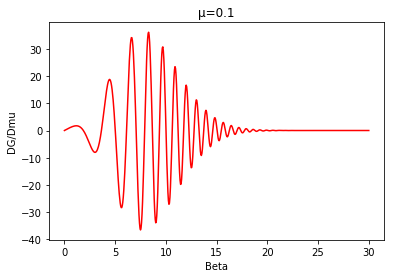

In [195]:
plt.ylabel('DG/Dmu')
plt.xlabel('Beta')
plt.title('μ=0.1')
plt.plot(beta_,gm_[5],'r')
plt.show()